#####Group: Team Query
#####Members: 
#####Umer Saeed
#####Rabeet Ahmad
#####Muhammad Waqas

#####Github: https://github.com/swatiforu/NLP-Project

In [29]:
!pip3 install sentence-transformers
!pip3 install scikit-learn
!pip3 install matplotlib
!pip3 install pandas
!pip install faiss-cpu

#Task 1
###Experiment with Sentence Embeddings

In [30]:
#Load the model sentence-transformers/all-MiniLM-L6-v2

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [31]:
#Encode 5–10 text samples and compute cosine similarity

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

#Sample texts (note: using sample texts such that all the possibilities are covered in terms of corelation/similarity)
texts = [
    "The cat sat on the windowsill, basking in the sunlight.",
    "A cat rested peacefully in the warm afternoon sun.", #Highly similar (positive correlation)
    "She enjoyed reading mystery novels during the weekends.",
    "Books and quiet evenings were part of her relaxing routine.", #Moderately similar (neutral-ish correlation)
    "The stock market showed signs of recovery after a turbulent week.",
    "Scientists discovered a new species of frog in the Amazon rainforest.",#Slightly related but distant topics (low correlation)
    "He fixed the car’s engine using a wrench and a manual.",
    "She baked a chocolate cake with vanilla frosting.",#Almost unrelated (very low correlation)
    "The weather was calm and sunny with birds chirping.",
    "Thunder roared as the storm destroyed trees and power lines."#Contrasting (semantically negative or opposite ideas)
]

embeddings = model.encode(texts)

cos_sim_matrix = cosine_similarity(embeddings)

import pandas as pd
cos_sim_df = pd.DataFrame(cos_sim_matrix, index=texts, columns=texts)
cos_sim_df.round(2)

,"The cat sat on the windowsill, basking in the sunlight.",A cat rested peacefully in the warm afternoon sun.,She enjoyed reading mystery novels during the weekends.,Books and quiet evenings were part of her relaxing routine.,The stock market showed signs of recovery after a turbulent week.,Scientists discovered a new species of frog in the Amazon rainforest.,He fixed the car’s engine using a wrench and a manual.,She baked a chocolate cake with vanilla frosting.,The weather was calm and sunny with birds chirping.,Thunder roared as the storm destroyed trees and power lines.
"The cat sat on the windowsill, basking in the sunlight.",1.00,0.66,0.11,0.21,0.01,0.04,0.03,0.09,0.30,0.09
A cat rested peacefully in the warm afternoon sun.,0.66,1.00,0.12,0.34,0.12,0.07,0.02,0.09,0.35,0.16
She enjoyed reading mystery novels during the weekends.,0.11,0.12,1.00,0.61,0.15,0.07,0.06,0.16,0.07,0.06
Books and quiet evenings were part of her relaxing routine.,0.21,0.34,0.61,1.00,0.13,0.05,0.05,0.18,0.21,0.13
The stock market showed signs of recovery after a turbulent week.,0.01,0.12,0.15,0.13,1.00,-0.03,0.04,-0.07,0.12,0.16
Scientists discovered a new species of frog in the Amazon rainforest.,0.04,0.07,0.07,0.05,-0.03,1.00,0.10,0.05,0.18,0.08
He fixed the car’s engine using a wrench and a manual.,0.03,0.02,0.06,0.05,0.04,0.10,1.00,0.09,0.09,0.19
She baked a chocolate cake with vanilla frosting.,0.09,0.09,0.16,0.18,-0.07,0.05,0.09,1.00,0.09,0.01
The weather was calm and sunny with birds chirping.,0.30,0.35,0.07,0.21,0.12,0.18,0.09,0.09,1.00,0.32
Thunder roared as the storm destroyed trees and power lines.,0.09,0.16,0.06,0.13,0.16,0.08,0.19,0.01,0.32,1.00


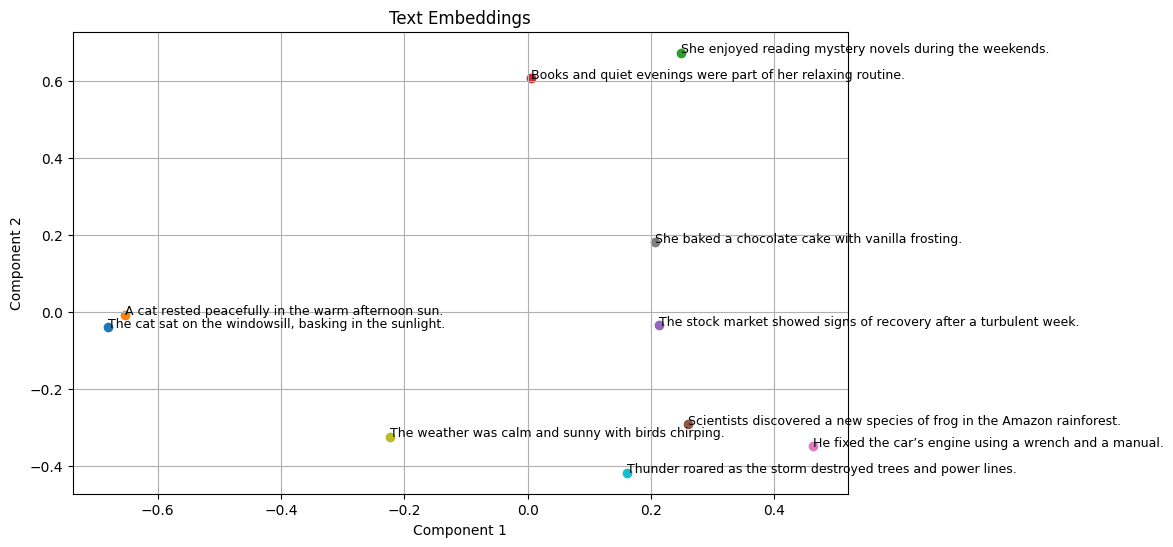

In [32]:
#Visualize embeddings using PCA or t-SNE

#Using PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

reducer = PCA(n_components=2)
reduced_embeddings = reducer.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
for i, text in enumerate(texts):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.text(x, y, text, fontsize=9)
plt.title('Text Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

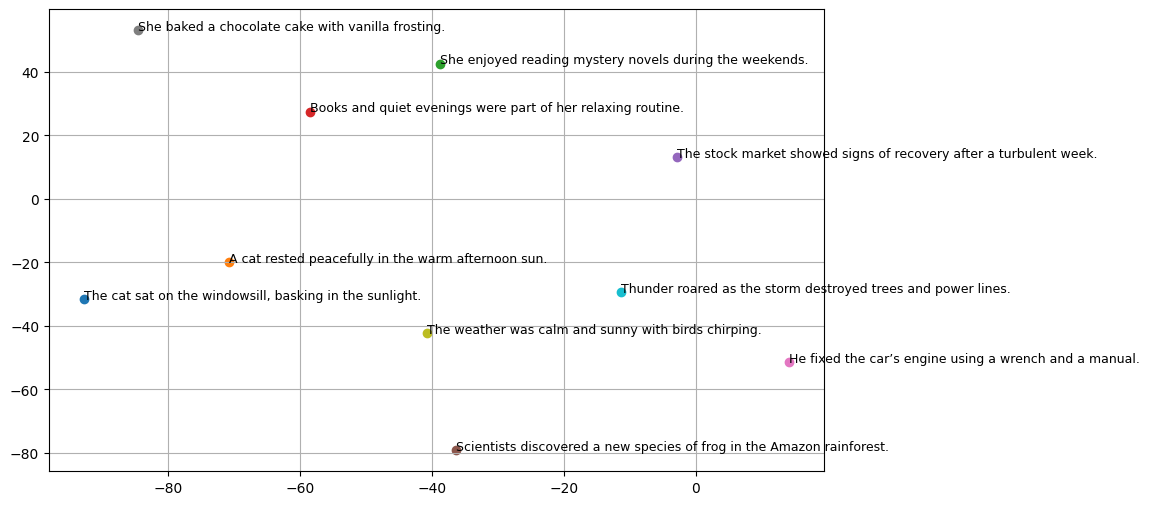

In [33]:
#Using t-SNE

from sklearn.manifold import TSNE
reducer = TSNE(n_components=2, perplexity=5, random_state=2)
reduced_embeddings = reducer.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
for i, text in enumerate(texts):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.text(x, y, text, fontsize=9)
plt.grid(True)
plt.show()

#Task 2
###Try out FAISS for Similarity Search

In [34]:
#Store your embedded text chunks in a FAISS index
import faiss
import numpy as np

index = faiss.IndexFlatL2(embeddings.shape[1])
index.add(np.array(embeddings).astype(np.float32))

In [35]:
#Query it with different formulations of the same question and print top-k matching chunks
queries = [
    "Where did cat sit?",
    "Who sat on windowsill?",
    "What was cat doing?",
    "Who was basking in sunlight"
]

#Ranks
k = 3

for query_text in queries:
    query_embedding = model.encode([query_text])
    distances, indices = index.search(np.array(query_embedding).astype(np.float32), k)

    print(f"\nQuery: {query_text}")
    for i, idx in enumerate(indices[0]):
        print(f"Rank {i + 1}: {texts[idx]} with similarity distance: {distances[0][i]}")



Query: Where did cat sit?
Rank 1: The cat sat on the windowsill, basking in the sunlight. with similarity distance: 0.8298097848892212
Rank 2: A cat rested peacefully in the warm afternoon sun. with similarity distance: 1.044844388961792
Rank 3: Books and quiet evenings were part of her relaxing routine. with similarity distance: 1.511850118637085

Query: Who sat on windowsill?
Rank 1: The cat sat on the windowsill, basking in the sunlight. with similarity distance: 1.3606650829315186
Rank 2: Books and quiet evenings were part of her relaxing routine. with similarity distance: 1.6322407722473145
Rank 3: She enjoyed reading mystery novels during the weekends. with similarity distance: 1.7300102710723877

Query: What was cat doing?
Rank 1: The cat sat on the windowsill, basking in the sunlight. with similarity distance: 0.9088584184646606
Rank 2: A cat rested peacefully in the warm afternoon sun. with similarity distance: 1.042372226715088
Rank 3: He fixed the car’s engine using a wrenc

Explanation

Low similarity distance suggests that the query and embedding were close/similar to each other and vice versa. In case of higher distance, the embeddings are futher apart in vector space. In our four different in wordings but same in meaning queries, the result was as correct as expected. But it is to be noted that in model struggled more with the "who" framing, possibly because it was different in text than the original embedding.

The smallest distance is picked up as the possible answer, and the results suggest that change in wording or formulation of query can result in bigger distances.